In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Set style for plots
plt.style.use('default')
sns.set_palette("husl")

In [3]:
# Load Dataset
df = pd.read_csv('D:\Perkuliahan\Semester 6\Bengkod\Bengkod\Dataset\ObesityDataSet.csv')
print("Dataset berhasil dimuat!")
print(f"Ukuran dataset: {df.shape}")

Dataset berhasil dimuat!
Ukuran dataset: (2111, 17)


In [4]:
# CELL 3: Tampilkan Beberapa Baris Pertama
print("=== 5 BARIS PERTAMA DATASET ===")
df.head()

=== 5 BARIS PERTAMA DATASET ===


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# CELL 4: Informasi Umum Dataset
print("=== INFORMASI UMUM DATASET ===")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("\n=== INFO DATASET ===")
df.info()

=== INFORMASI UMUM DATASET ===
Jumlah baris: 2111
Jumlah kolom: 17

=== INFO DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with

In [6]:
# CELL 5: Deskripsi Statistik Data
print("=== DESKRIPSI STATISTIK DATA NUMERIK ===")
df.describe()

=== DESKRIPSI STATISTIK DATA NUMERIK ===


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [7]:
# CELL 6: Tipe Data Setiap Kolom
print("=== TIPE DATA SETIAP KOLOM ===")
print(df.dtypes)
print("\n=== NAMA KOLOM ===")
print(df.columns.tolist())

=== TIPE DATA SETIAP KOLOM ===
Age                               object
Gender                            object
Height                            object
Weight                            object
CALC                              object
FAVC                              object
FCVC                              object
NCP                               object
SCC                               object
SMOKE                             object
CH2O                              object
family_history_with_overweight    object
FAF                               object
TUE                               object
CAEC                              object
MTRANS                            object
NObeyesdad                        object
dtype: object

=== NAMA KOLOM ===
['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS', 'NObeyesdad']


In [ ]:
# CELL 7: Cek Missing Values
print("=== CEK MISSING VALUES ===")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

=== CEK MISSING VALUES ===
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Total missing values: 150


In [10]:
# CELL 8: Cek Data Duplikat
print("=== CEK DATA DUPLIKAT ===")
duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

if duplicates > 0:
    print("Contoh data duplikat:")
    print(df[df.duplicated()].head())

=== CEK DATA DUPLIKAT ===
Jumlah data duplikat: 18
Contoh data duplikat:
    Age  Gender Height Weight       CALC FAVC FCVC NCP SCC SMOKE CH2O  \
98   21  Female   1.52     42  Sometimes   no    3   1  no    no    1   
174  21    Male   1.62     70  Sometimes  yes    2   1  no    no    3   
179  21    Male   1.62     70  Sometimes  yes    2   1  no    no    3   
184  21    Male   1.62     70  Sometimes  yes    2   1  no    no    3   
309  16  Female   1.66     58         no   no    2   1  no    no    1   

    family_history_with_overweight FAF TUE        CAEC                 MTRANS  \
98                              no   0   0  Frequently  Public_Transportation   
174                             no   1   0          no  Public_Transportation   
179                             no   1   0          no  Public_Transportation   
184                             no   1   0          no  Public_Transportation   
309                             no   0   1   Sometimes                Walking   

 

In [11]:
# CELL 9: Unique Values untuk Setiap Kolom
print("=== UNIQUE VALUES SETIAP KOLOM ===")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")
    if df[col].dtype == 'object' or unique_count < 20:
        print(f"   Values: {df[col].unique()[:10]}")
    print()

=== UNIQUE VALUES SETIAP KOLOM ===
Age: 1394 unique values
   Values: ['21' '23' '27' '22' '29' '24' '26' '41' '30' '52']

Gender: 3 unique values
   Values: ['Female' 'Male' '?' nan]

Height: 1562 unique values
   Values: ['1.62' '1.52' '1.8' '1.78' '1.5' '1.64' '1.72' '1.85' '1.65' '1.77']

Weight: 1518 unique values
   Values: ['64' '56' '77' '87' '89.8' '53' '55' '348.49777557852735' '68' '105']

CALC: 5 unique values
   Values: ['no' 'Sometimes' 'Frequently' '?' 'Always' nan]

FAVC: 3 unique values
   Values: ['no' 'yes' '?' nan]

FCVC: 808 unique values
   Values: ['2' '3' '1' nan '?' '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876']

NCP: 637 unique values
   Values: ['3' '1' '4' '10.84070601060834' nan '?' '11.23368726240087'
 '11.858467462996222' '3.28926' '3.995147']

SCC: 3 unique values
   Values: ['no' 'yes' nan '?']

SMOKE: 3 unique values
   Values: ['no' 'yes' '?' nan]

CH2O: 1263 unique values
   Values: ['2' '3' '1' nan '8.28395253296839' '8.433

In [12]:
# CELL 10: Analisis Target Variable
print("=== ANALISIS TARGET VARIABLE (NObeyesdad) ===")
target_counts = df['NObeyesdad'].value_counts()
print(target_counts)
print(f"\nPersentase distribusi:")
print((target_counts / len(df) * 100).round(2))

=== ANALISIS TARGET VARIABLE (NObeyesdad) ===
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

Persentase distribusi:
NObeyesdad
Obesity_Type_I         16.63
Obesity_Type_III       15.35
Obesity_Type_II        14.07
Overweight_Level_I     13.74
Overweight_Level_II    13.74
Normal_Weight          13.60
Insufficient_Weight    12.88
Name: count, dtype: float64


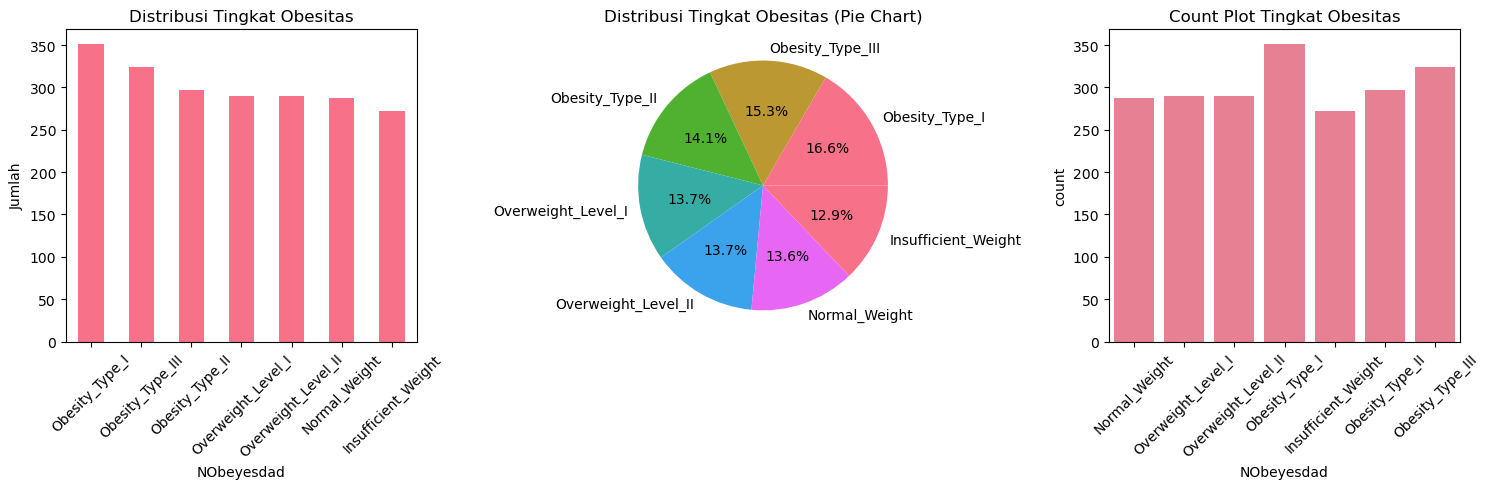

In [13]:
# CELL 11: Visualisasi Distribusi Target Variable
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df['NObeyesdad'].value_counts().plot(kind='bar')
plt.title('Distribusi Tingkat Obesitas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
df['NObeyesdad'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribusi Tingkat Obesitas (Pie Chart)')
plt.ylabel('')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='NObeyesdad')
plt.title('Count Plot Tingkat Obesitas')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

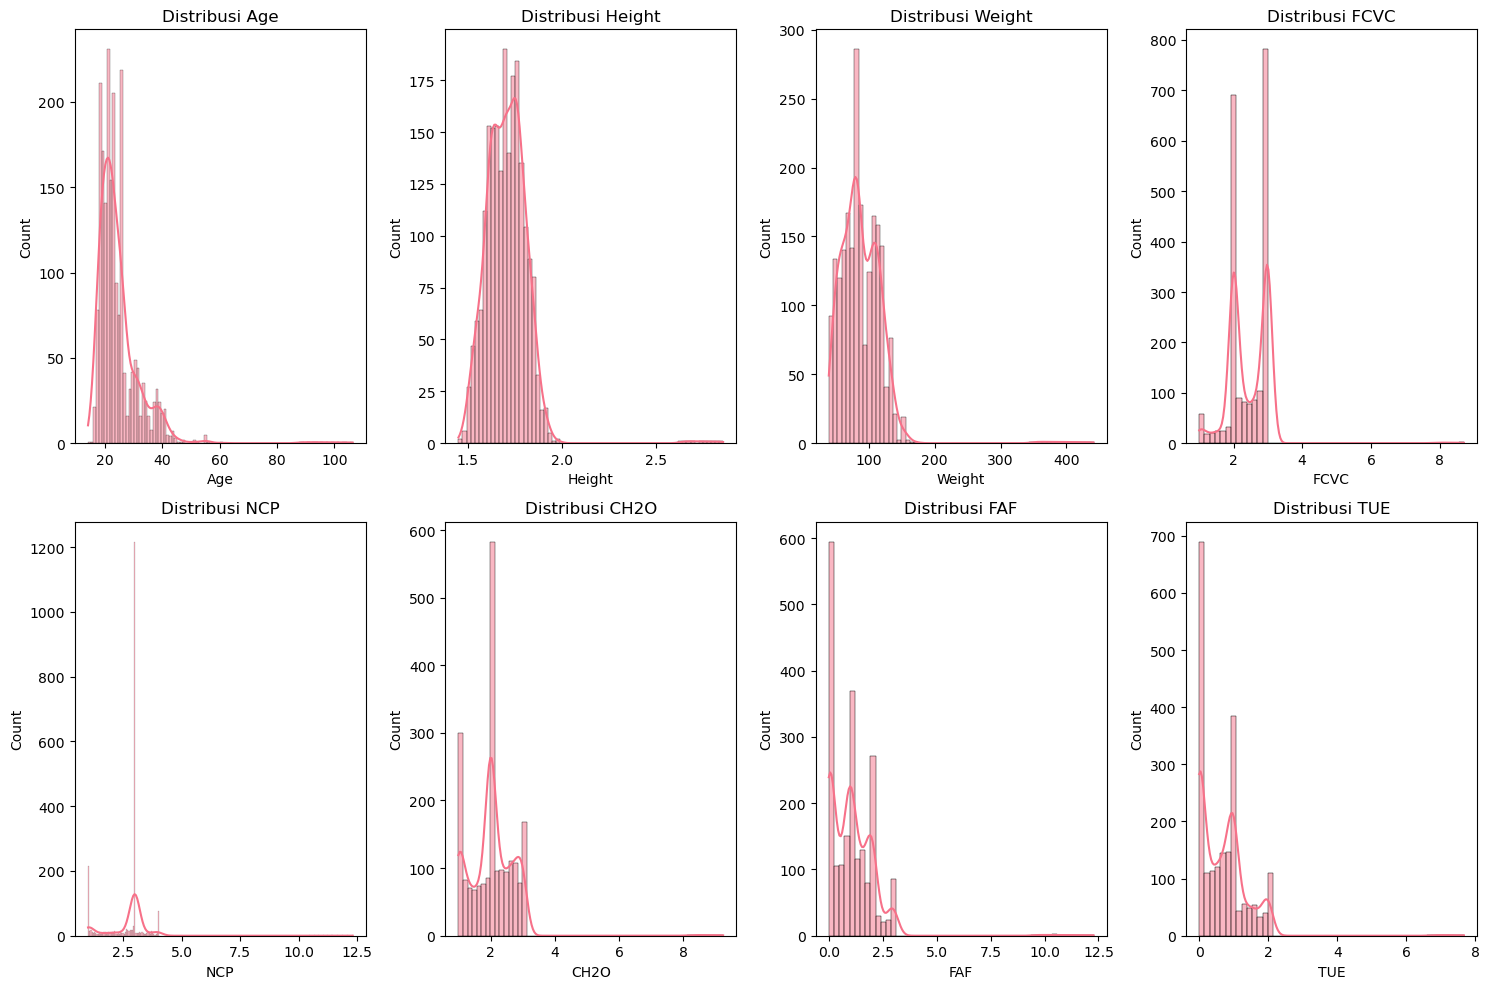

In [16]:
# Visualisasi Data Numerik
# Konversi numerik untuk visualisasi
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Visualisasi distribusi kolom numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

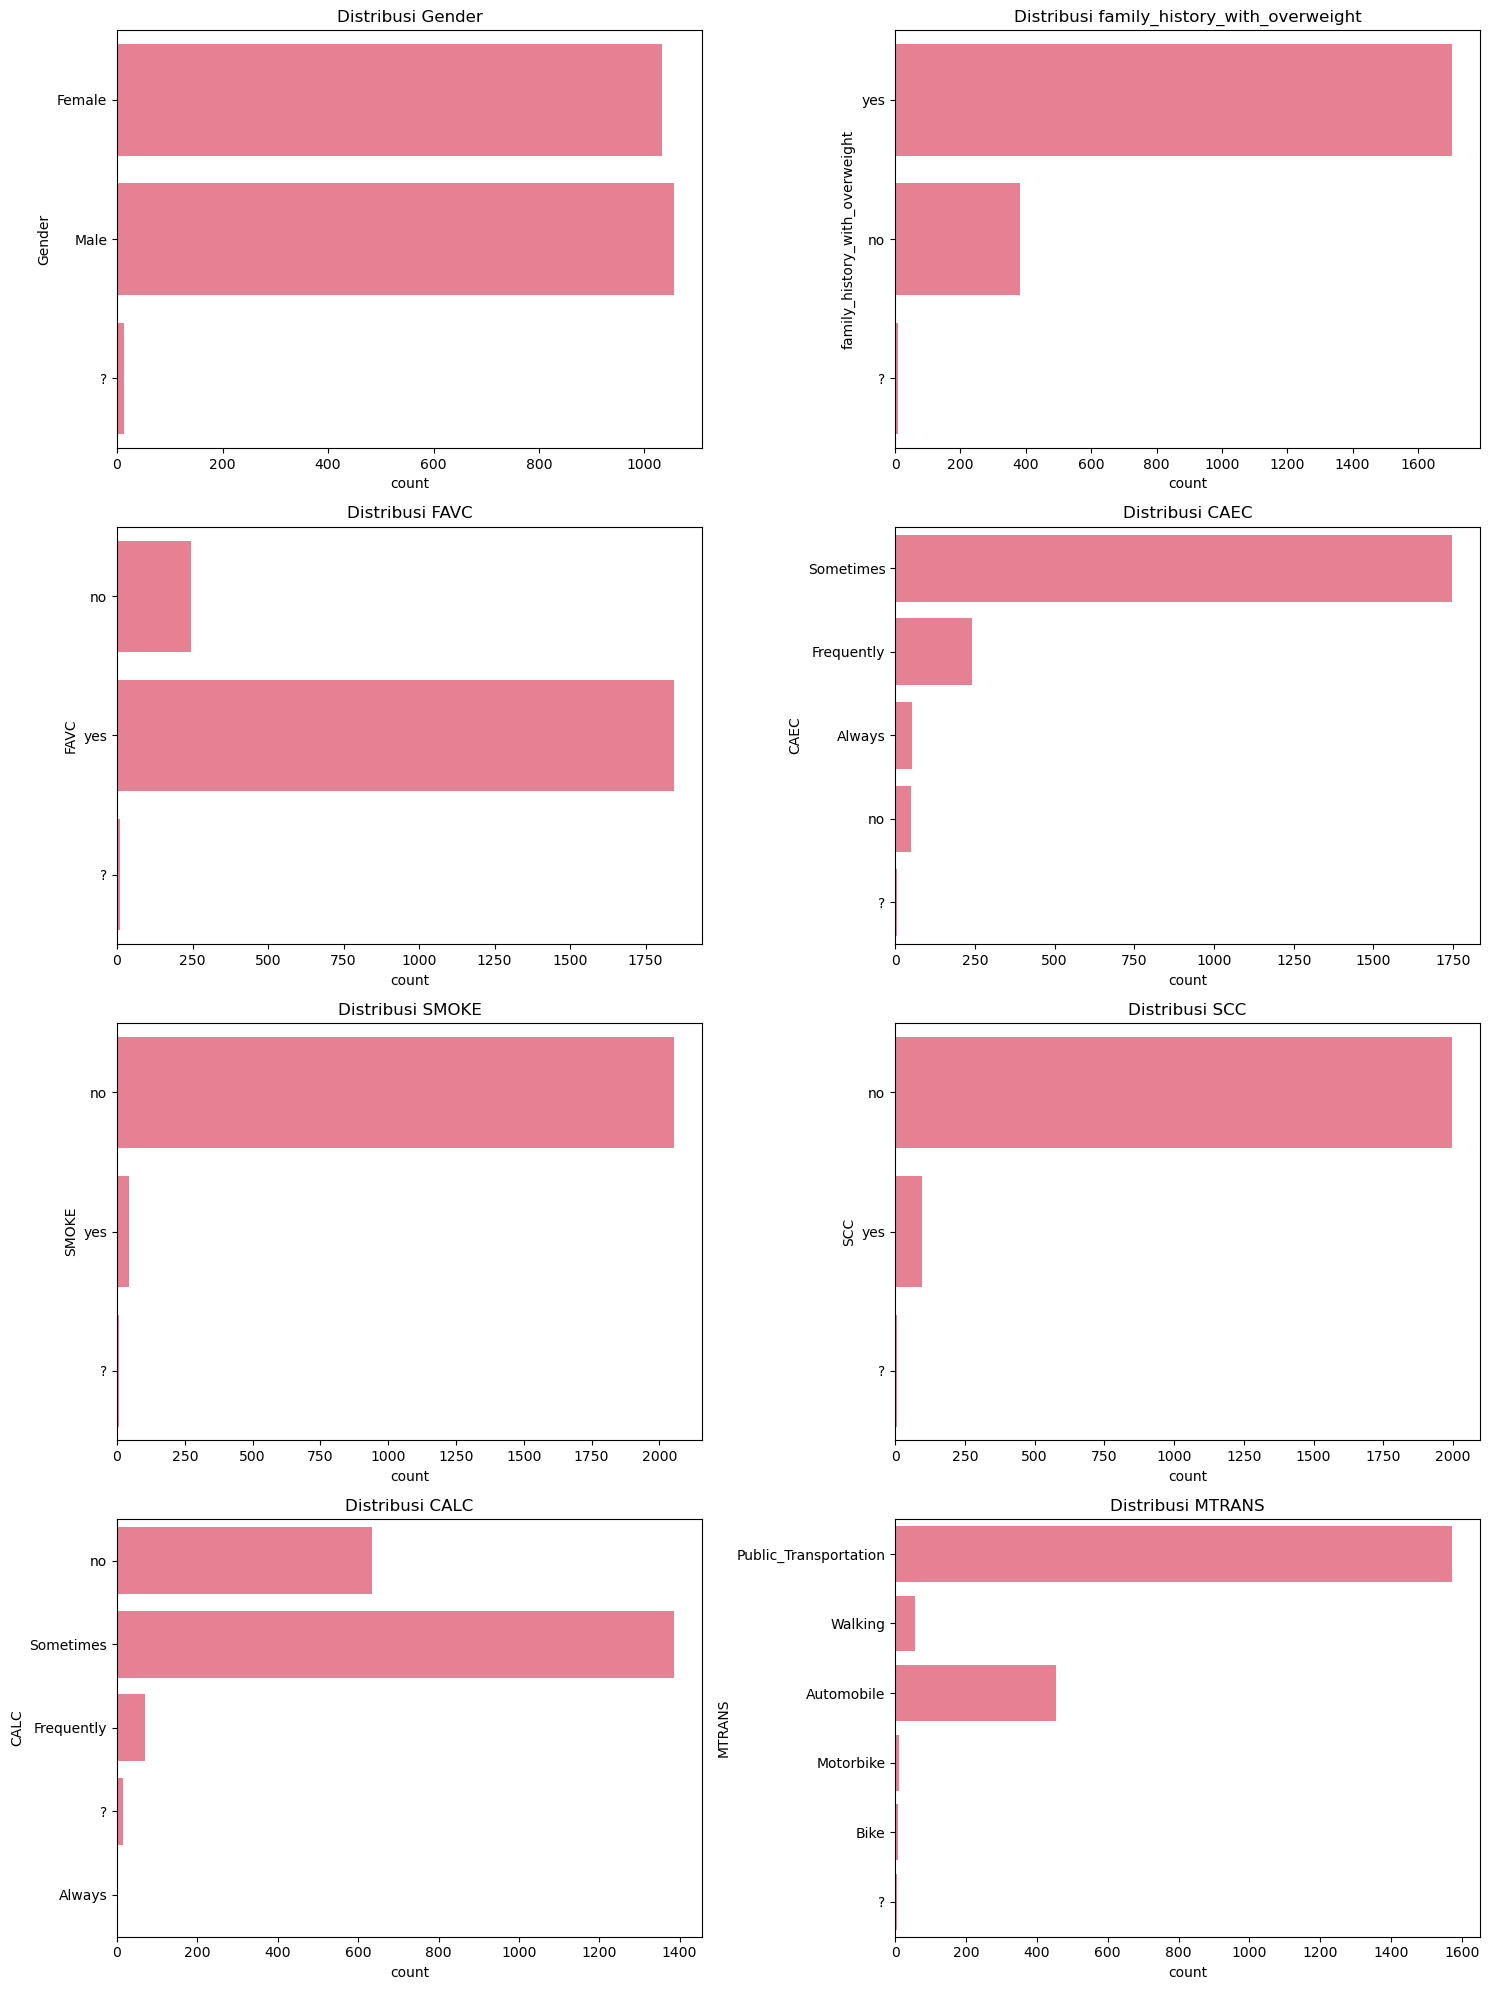

In [17]:
# Distribusi Kategorikal
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(y=df[col])
    plt.title(f'Distribusi {col}')
    plt.tight_layout()
plt.show()

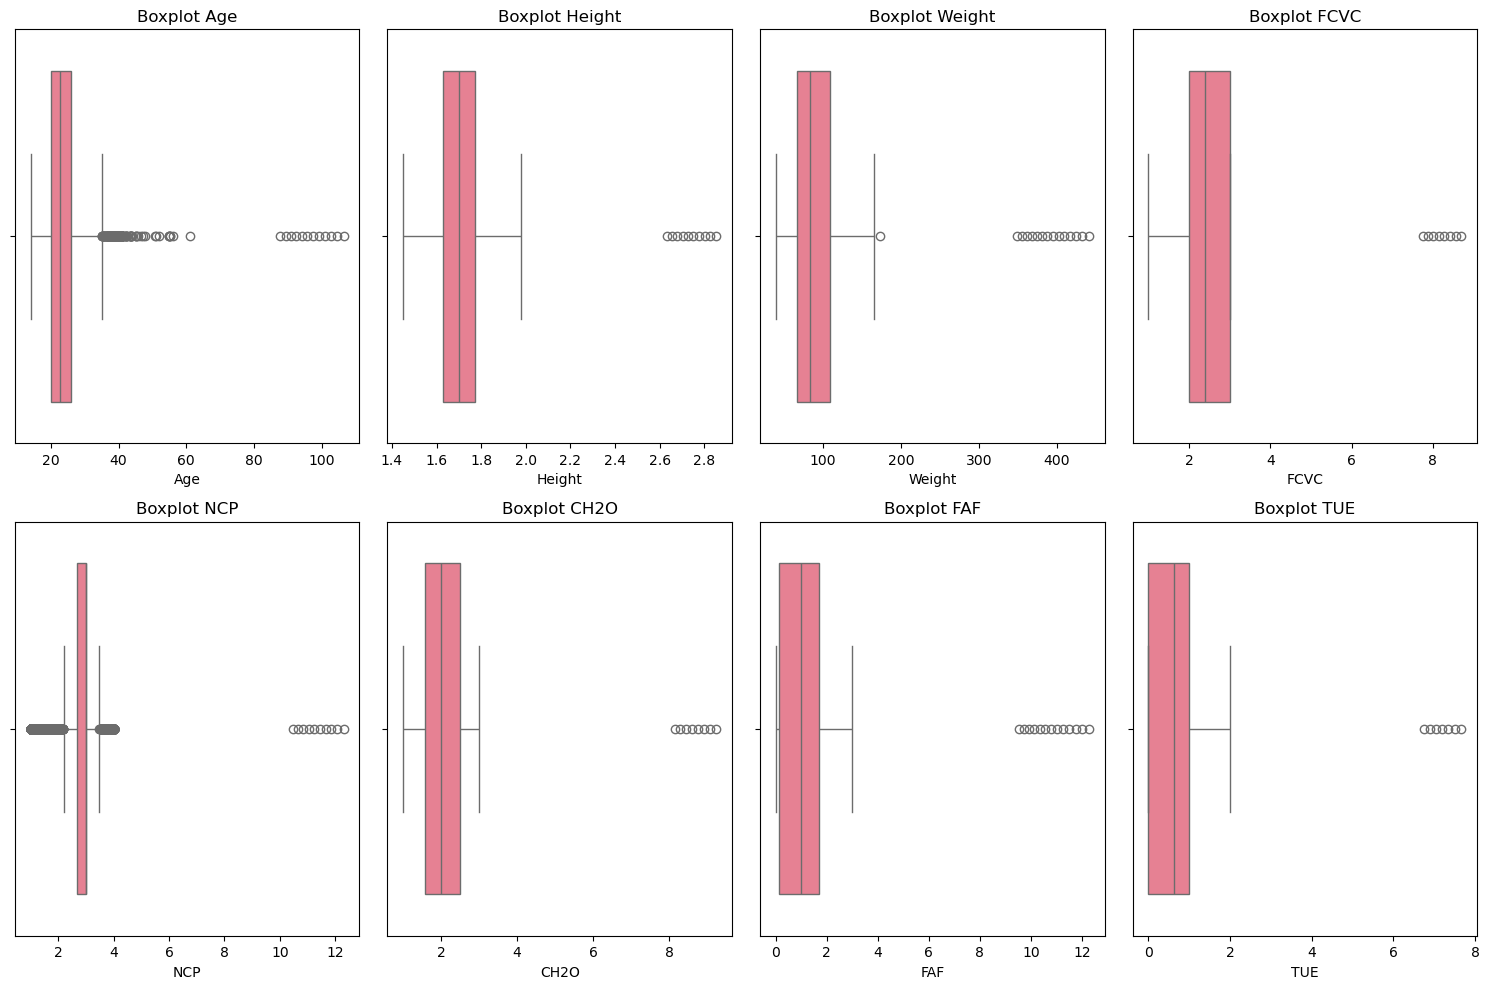

In [19]:
# Visualisasi Outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

In [20]:
# CELL 15: Statistik Outlier
print("=== DETEKSI OUTLIER MENGGUNAKAN IQR ===")
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)
    
    print(f"{col}:")
    print(f"  Lower bound: {lower_bound:.2f}")
    print(f"  Upper bound: {upper_bound:.2f}")
    print(f"  Jumlah outlier: {len(outliers)}")
    print()

=== DETEKSI OUTLIER MENGGUNAKAN IQR ===
Age:
  Lower bound: 10.89
  Upper bound: 35.07
  Jumlah outlier: 179

Height:
  Lower bound: 1.42
  Upper bound: 1.98
  Jumlah outlier: 10

Weight:
  Lower bound: 2.92
  Upper bound: 171.14
  Jumlah outlier: 15

FCVC:
  Lower bound: 0.50
  Upper bound: 4.50
  Jumlah outlier: 8

NCP:
  Lower bound: 2.19
  Upper bound: 3.49
  Jumlah outlier: 592

CH2O:
  Lower bound: 0.20
  Upper bound: 3.85
  Jumlah outlier: 8

FAF:
  Lower bound: -2.20
  Upper bound: 4.02
  Jumlah outlier: 13

TUE:
  Lower bound: -1.50
  Upper bound: 2.50
  Jumlah outlier: 7



In [21]:
# ================== PREPROCESSING DATA ==================

# CELL 18: Handling Missing Values (jika ada)
print("=== HANDLING MISSING VALUES ===")
if df.isnull().sum().sum() > 0:
    print("Menangani missing values...")
    # Untuk numerik: isi dengan median
    numeric_cols_with_na = df.select_dtypes(include=[np.number]).columns[df.select_dtypes(include=[np.number]).isnull().any()].tolist()
    for col in numeric_cols_with_na:
        df[col].fillna(df[col].median(), inplace=True)
    
    # Untuk kategorikal: isi dengan modus
    categorical_cols_with_na = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).isnull().any()].tolist()
    for col in categorical_cols_with_na:
        df[col].fillna(df[col].mode()[0], inplace=True)
    
    print("Missing values telah ditangani")
else:
    print("Tidak ada missing values yang perlu ditangani")

=== HANDLING MISSING VALUES ===
Menangani missing values...
Missing values telah ditangani


In [22]:
# CELL 19: Remove Duplicates
print("=== REMOVE DUPLICATES ===")
before_dup = len(df)
df = df.drop_duplicates()
after_dup = len(df)
print(f"Data sebelum: {before_dup}")
print(f"Data sesudah: {after_dup}")
print(f"Data duplikat yang dihapus: {before_dup - after_dup}")

=== REMOVE DUPLICATES ===
Data sebelum: 2111
Data sesudah: 2092
Data duplikat yang dihapus: 19


=== HANDLING OUTLIERS ===


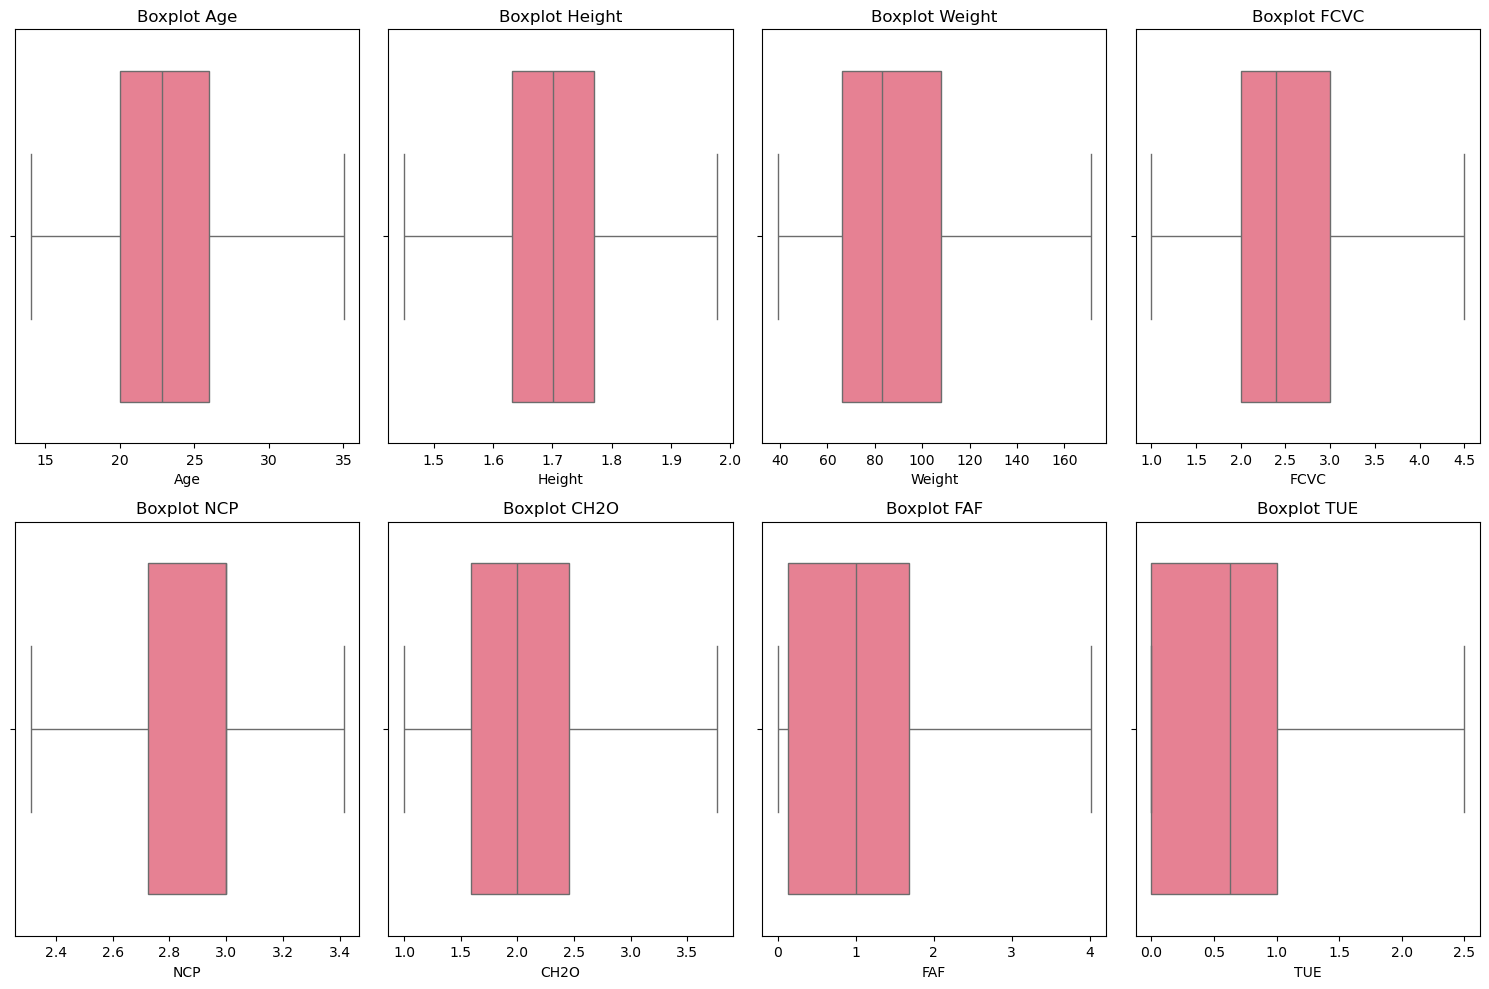

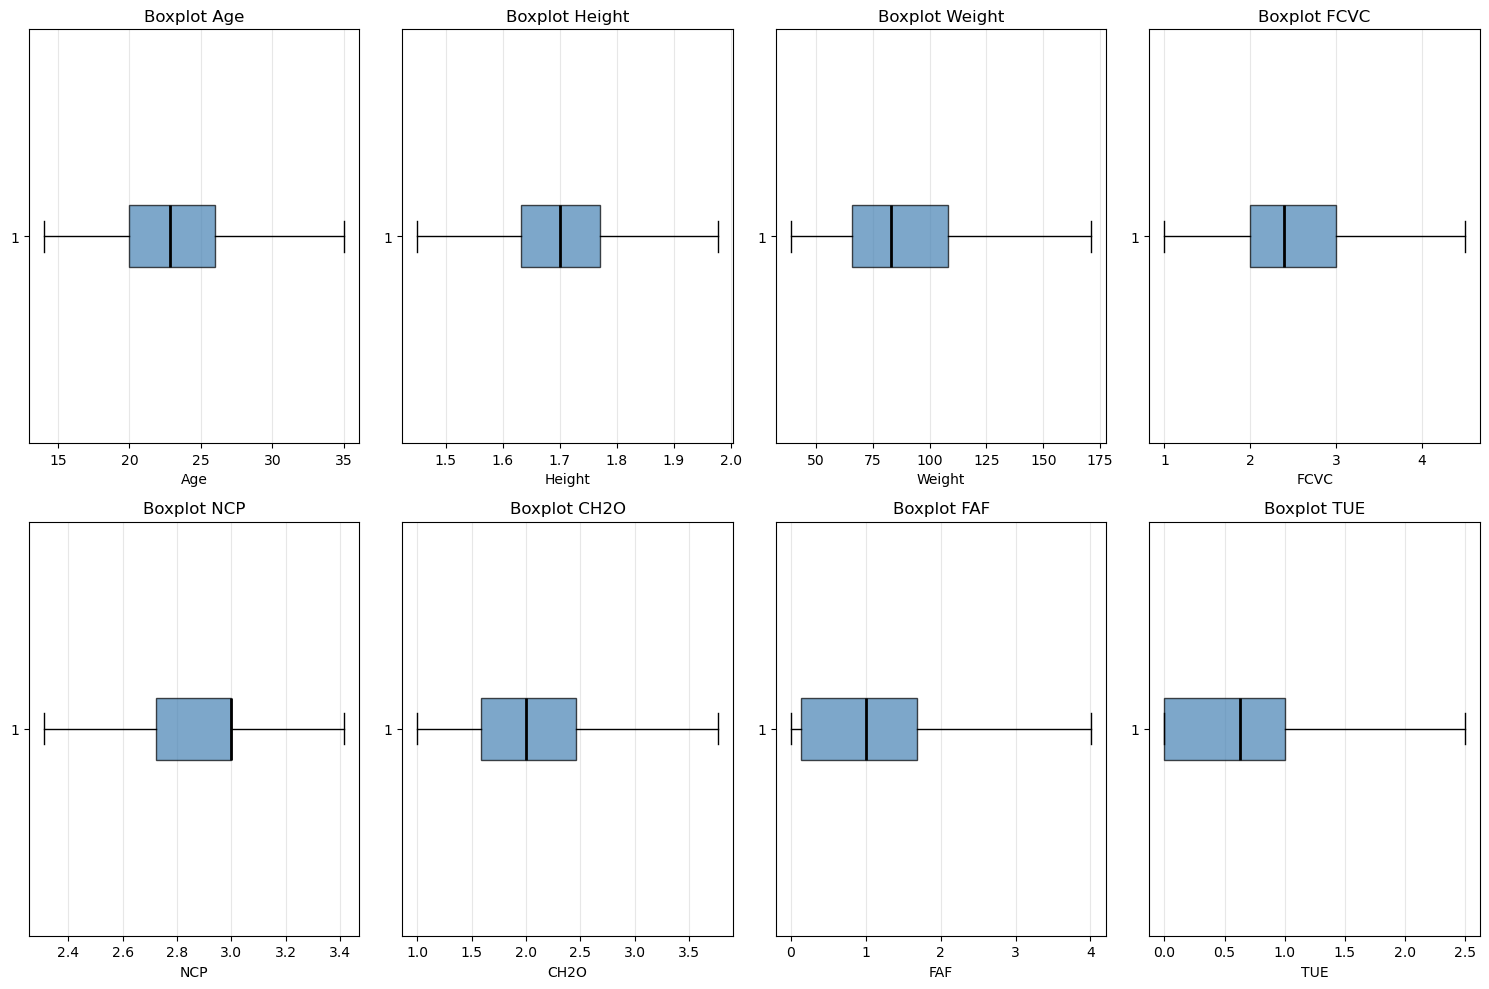

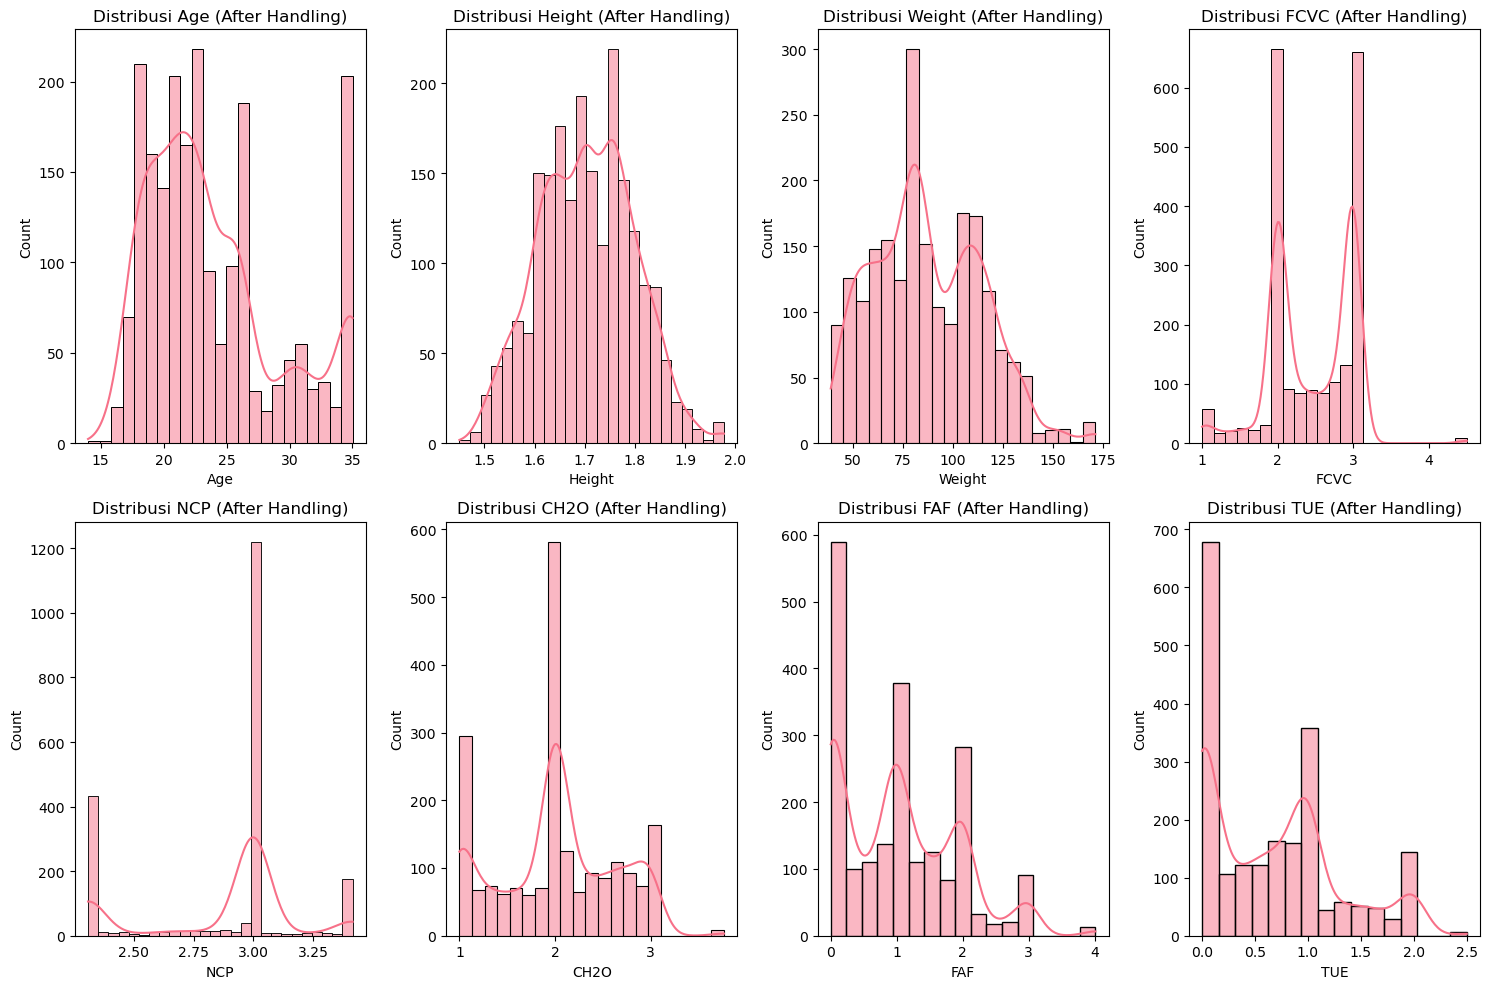

In [25]:
# CELL 20: Handling Outliers
print("=== HANDLING OUTLIERS ===")
df_clean = df.copy()

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_clean[col] = np.where(df_clean[col] > upper_bound, upper_bound,
                              np.where(df_clean[col] < lower_bound, lower_bound, df_clean[col]))

# Visualisasi boxplot setelah handling outlier (HORIZONTAL/LANDSCAPE)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df_clean[col], orient='h')  # Menggunakan x= dan orient='h' untuk horizontal
    plt.title(f'Boxplot {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# Alternatif: Jika ingin lebih mirip dengan gambar referensi
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    plt.boxplot(df_clean[col], vert=False, patch_artist=True,
                boxprops=dict(facecolor='steelblue', alpha=0.7),
                medianprops=dict(color='black', linewidth=2))
    plt.xlabel(col)
    plt.title(f'Boxplot {col}')
    plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Tambahan visualisasi distribusi setelah handling outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribusi {col} (After Handling)')
plt.tight_layout()
plt.show()

In [26]:
# CELL 21: Encode Categorical Variables
print("=== ENCODING CATEGORICAL VARIABLES ===")
df_encoded = df_clean.copy()

# Simpan label encoder untuk setiap kolom kategorikal
label_encoders = {}

categorical_columns = df_encoded.select_dtypes(include=['object']).columns.tolist()
print(f"Kolom kategorikal yang akan di-encode: {categorical_columns}")

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"{col} telah di-encode")

print("Semua kolom kategorikal telah di-encode")

=== ENCODING CATEGORICAL VARIABLES ===
Kolom kategorikal yang akan di-encode: ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']
Gender telah di-encode
CALC telah di-encode
FAVC telah di-encode
SCC telah di-encode
SMOKE telah di-encode
family_history_with_overweight telah di-encode
CAEC telah di-encode
MTRANS telah di-encode
NObeyesdad telah di-encode
Semua kolom kategorikal telah di-encode


=== FEATURE SELECTION ANALYSIS ===
Korelasi absolut dengan target variable:
Weight                            0.378279
family_history_with_overweight    0.318943
CAEC                              0.298071
Age                               0.260654
FAF                               0.137754
NCP                               0.126583
CALC                              0.114750
CH2O                              0.087200
TUE                               0.062337
FAVC                              0.049513
SCC                               0.046763
MTRANS                            0.044361
Height                            0.041536
FCVC                              0.019877
Gender                            0.018706
SMOKE                             0.016131
dtype: float64


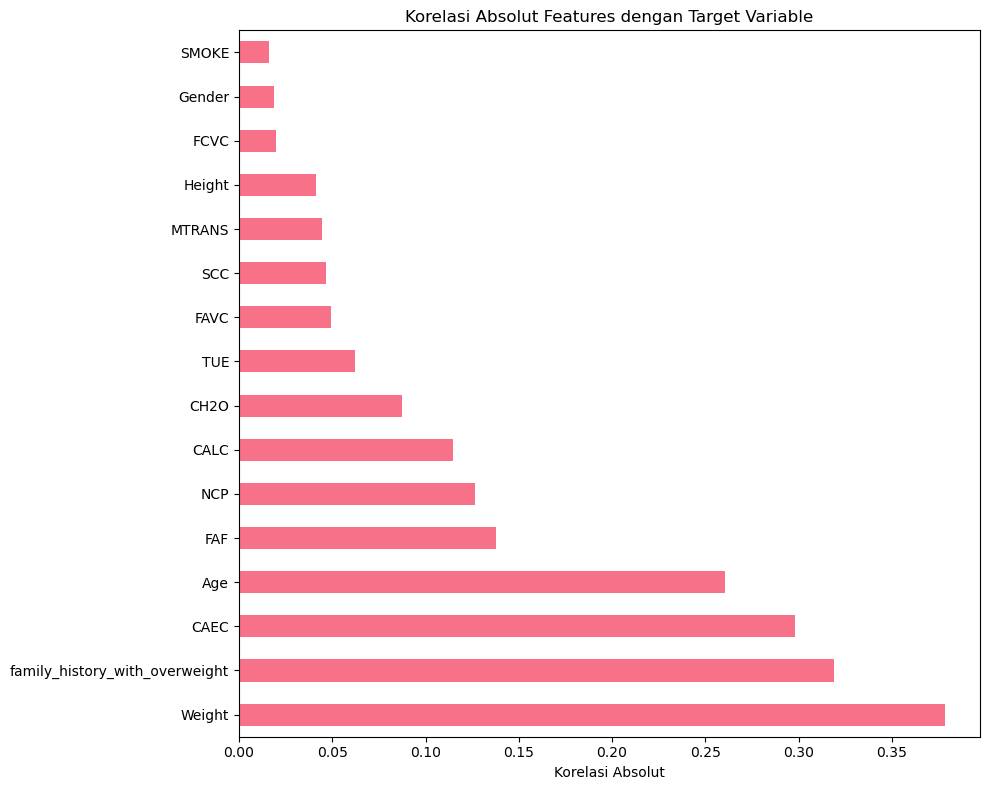


Features yang dipilih (korelasi > 0.1): ['Weight', 'family_history_with_overweight', 'CAEC', 'Age', 'FAF', 'NCP', 'CALC']


In [27]:
# CELL 22: Feature Selection Analysis
print("=== FEATURE SELECTION ANALYSIS ===")
# Hitung korelasi dengan target variable
target_encoded = df_encoded['NObeyesdad']
features = df_encoded.drop('NObeyesdad', axis=1)

correlation_with_target = features.corrwith(target_encoded).abs().sort_values(ascending=False)
print("Korelasi absolut dengan target variable:")
print(correlation_with_target)

# Visualisasi feature importance
plt.figure(figsize=(10, 8))
correlation_with_target.plot(kind='barh')
plt.title('Korelasi Absolut Features dengan Target Variable')
plt.xlabel('Korelasi Absolut')
plt.tight_layout()
plt.show()

# Pilih features dengan korelasi > 0.1
selected_features = correlation_with_target[correlation_with_target > 0.1].index.tolist()
print(f"\nFeatures yang dipilih (korelasi > 0.1): {selected_features}")

=== PREPARE FINAL DATASET ===
Shape features (X): (2092, 16)
Shape target (y): (2092,)
Features: ['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS']
=== CHECK CLASS IMBALANCE ===
Distribusi kelas:
NObeyesdad
0    269
1    285
2    351
3    297
4    324
5    276
6    290
Name: count, dtype: int64


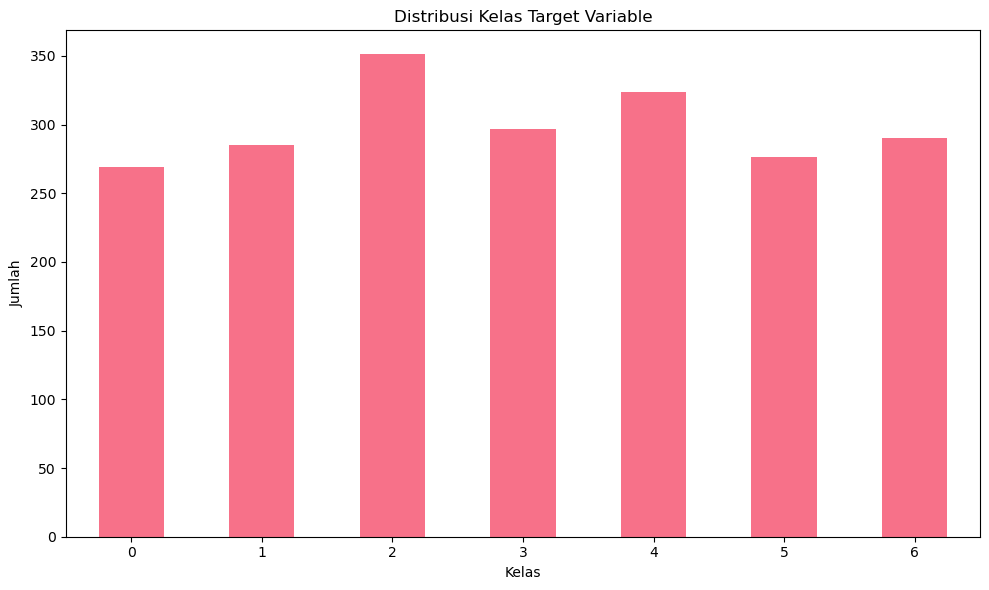

Imbalance ratio: 1.30


In [28]:
# CELL 23: Prepare Final Dataset
print("=== PREPARE FINAL DATASET ===")
# Gunakan semua features untuk modeling (bisa disesuaikan berdasarkan analisis di atas)
X = df_encoded.drop('NObeyesdad', axis=1)
y = df_encoded['NObeyesdad']

print(f"Shape features (X): {X.shape}")
print(f"Shape target (y): {y.shape}")
print(f"Features: {X.columns.tolist()}")

# CELL 24: Check Class Imbalance
print("=== CHECK CLASS IMBALANCE ===")
class_distribution = y.value_counts().sort_index()
print("Distribusi kelas:")
print(class_distribution)

# Visualisasi keseimbangan kelas
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title('Distribusi Kelas Target Variable')
plt.ylabel('Jumlah')
plt.xlabel('Kelas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Hitung imbalance ratio
min_class = class_distribution.min()
max_class = class_distribution.max()
imbalance_ratio = max_class / min_class
print(f"Imbalance ratio: {imbalance_ratio:.2f}")

In [29]:
# CELL 25: Handle Class Imbalance with SMOTE
print("=== HANDLE CLASS IMBALANCE ===")
print("Distribusi kelas sebelum balancing:")
print(y.value_counts().sort_index())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

print("\nDistribusi kelas setelah SMOTE:")
print(pd.Series(y_balanced).value_counts().sort_index())

print(f"\nShape sebelum SMOTE: X={X.shape}, y={y.shape}")
print(f"Shape setelah SMOTE: X={X_balanced.shape}, y={y_balanced.shape}")

=== HANDLE CLASS IMBALANCE ===
Distribusi kelas sebelum balancing:
NObeyesdad
0    269
1    285
2    351
3    297
4    324
5    276
6    290
Name: count, dtype: int64

Distribusi kelas setelah SMOTE:
NObeyesdad
0    351
1    351
2    351
3    351
4    351
5    351
6    351
Name: count, dtype: int64

Shape sebelum SMOTE: X=(2092, 16), y=(2092,)
Shape setelah SMOTE: X=(2457, 16), y=(2457,)


In [30]:
# CELL 26: Split Data
print("=== SPLIT DATA ===")
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_balanced
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

=== SPLIT DATA ===
X_train shape: (1965, 16)
X_test shape: (492, 16)
y_train shape: (1965,)
y_test shape: (492,)


In [31]:
# CELL 27: Feature Scaling
print("=== FEATURE SCALING ===")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

=== FEATURE SCALING ===
Feature scaling completed
X_train_scaled shape: (1965, 16)
X_test_scaled shape: (492, 16)


In [32]:
# ================== MODELING DAN EVALUASI ==================

# CELL 29: Initialize Models
print("=== INITIALIZE MODELS ===")
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

print(f"Models yang akan digunakan: {list(models.keys())}")

=== INITIALIZE MODELS ===
Models yang akan digunakan: ['Random Forest', 'Gradient Boosting', 'SVM', 'Logistic Regression']


In [33]:
# CELL 30: Train and Evaluate Models
print("=== TRAIN AND EVALUATE MODELS ===")
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'predictions': y_pred,
        'model': model
    }
    
    print(f"{name} Results:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")

=== TRAIN AND EVALUATE MODELS ===

Training Random Forest...
Random Forest Results:
  Accuracy: 0.9533
  Precision: 0.9543
  Recall: 0.9533
  F1-Score: 0.9533

Training Gradient Boosting...
Gradient Boosting Results:
  Accuracy: 0.9431
  Precision: 0.9432
  Recall: 0.9431
  F1-Score: 0.9428

Training SVM...
SVM Results:
  Accuracy: 0.8598
  Precision: 0.8655
  Recall: 0.8598
  F1-Score: 0.8614

Training Logistic Regression...
Logistic Regression Results:
  Accuracy: 0.8028
  Precision: 0.8037
  Recall: 0.8028
  F1-Score: 0.7985


=== CONFUSION MATRIX FOR ALL MODELS ===


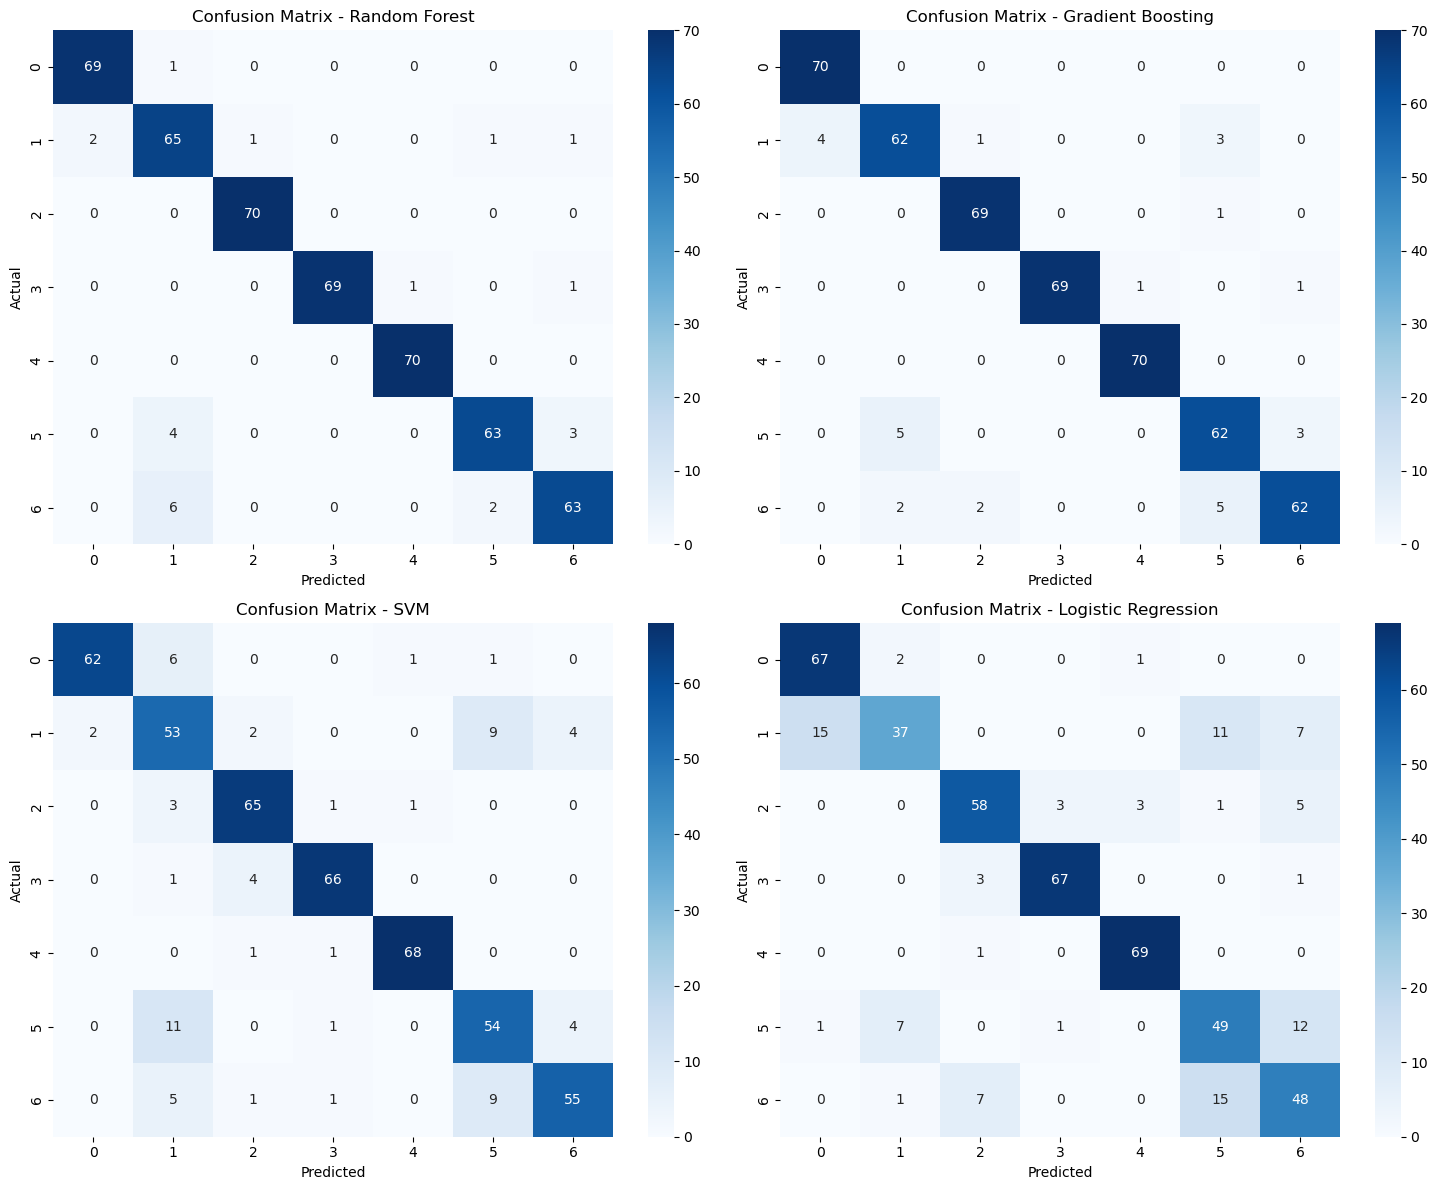

In [34]:
# CELL 31: Confusion Matrix for All Models
print("=== CONFUSION MATRIX FOR ALL MODELS ===")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['predictions'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [35]:
# CELL 32: Detailed Classification Report
print("=== DETAILED CLASSIFICATION REPORT ===")
for name, result in results.items():
    print(f"\n{'='*50}")
    print(f"CLASSIFICATION REPORT - {name}")
    print(f"{'='*50}")
    print(classification_report(y_test, result['predictions']))

# CELL 33: Model Performance Comparison
print("=== MODEL PERFORMANCE COMPARISON ===")
metrics_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results],
    'Precision': [results[model]['precision'] for model in results],
    'Recall': [results[model]['recall'] for model in results],
    'F1-Score': [results[model]['f1_score'] for model in results]
})

print(metrics_df.round(4))

=== DETAILED CLASSIFICATION REPORT ===

CLASSIFICATION REPORT - Random Forest
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        70
           1       0.86      0.93      0.89        70
           2       0.99      1.00      0.99        70
           3       1.00      0.97      0.99        71
           4       0.99      1.00      0.99        70
           5       0.95      0.90      0.93        70
           6       0.93      0.89      0.91        71

    accuracy                           0.95       492
   macro avg       0.95      0.95      0.95       492
weighted avg       0.95      0.95      0.95       492


CLASSIFICATION REPORT - Gradient Boosting
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        70
           1       0.90      0.89      0.89        70
           2       0.96      0.99      0.97        70
           3       1.00      0.97      0.99        71
           

In [36]:
# CELL 33: Model Performance Comparison
print("=== MODEL PERFORMANCE COMPARISON ===")
metrics_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results],
    'Precision': [results[model]['precision'] for model in results],
    'Recall': [results[model]['recall'] for model in results],
    'F1-Score': [results[model]['f1_score'] for model in results]
})

print(metrics_df.round(4))

=== MODEL PERFORMANCE COMPARISON ===
                 Model  Accuracy  Precision  Recall  F1-Score
0        Random Forest    0.9533     0.9543  0.9533    0.9533
1    Gradient Boosting    0.9431     0.9432  0.9431    0.9428
2                  SVM    0.8598     0.8655  0.8598    0.8614
3  Logistic Regression    0.8028     0.8037  0.8028    0.7985


=== VISUALISASI PERBANDINGAN PERFORMA MODEL ===


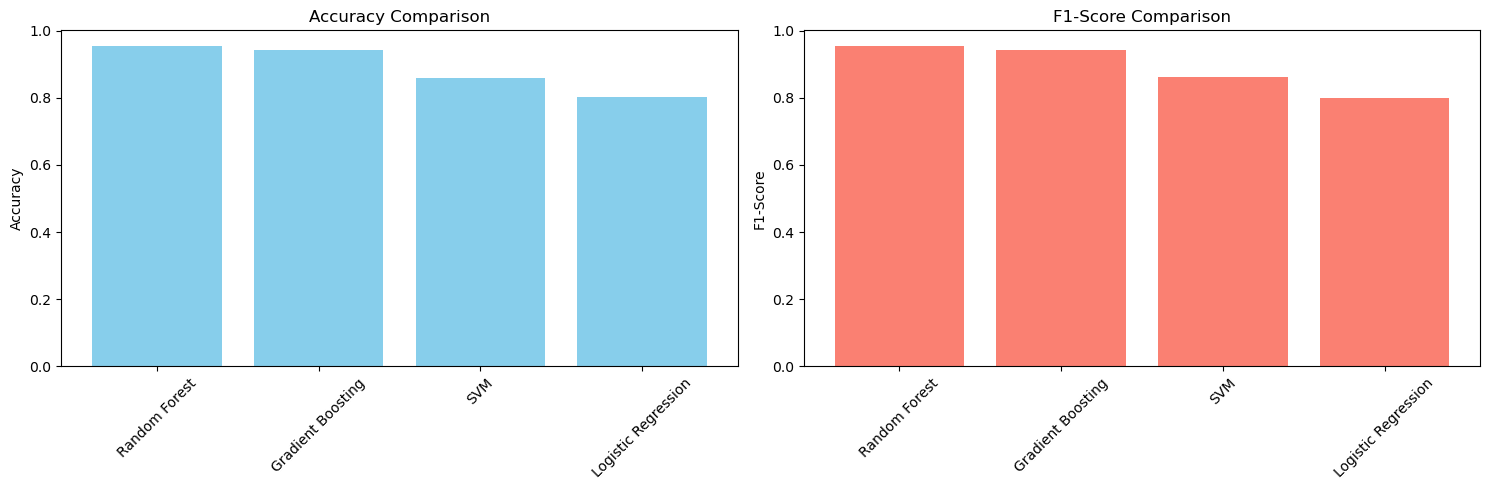

In [37]:
# CELL 34: Visualisasi Perbandingan Performa
print("=== VISUALISASI PERBANDINGAN PERFORMA MODEL ===")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy comparison
axes[0].bar(metrics_df['Model'], metrics_df['Accuracy'], color='skyblue')
axes[0].set_title('Accuracy Comparison')
axes[0].set_ylabel('Accuracy')
axes[0].set_xticklabels(metrics_df['Model'], rotation=45)

# F1-Score comparison
axes[1].bar(metrics_df['Model'], metrics_df['F1-Score'], color='salmon')
axes[1].set_title('F1-Score Comparison')
axes[1].set_ylabel('F1-Score')
axes[1].set_xticklabels(metrics_df['Model'], rotation=45)

plt.tight_layout()
plt.show()